<a href="https://colab.research.google.com/github/NoritomoWatanabe/Noritomo/blob/main/DL7_ynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


In [2]:
import sys,os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1,5,5,stride=1,pad=0)
print(col1.shape)


(9, 75)


In [3]:
x2 = np.random.rand(10,3,7,7)
col2=im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(90, 75)


In [4]:
class Convolution:
  def __init__(self,w,b,stride=1,pad=0):
    self.W=W
    self.b = b
    self.stride = stride
    self.pad=pad

  def forward(self,x):
    FN,C,FH,FW = self.W.shape
    out_h=int(1+(H+2*self.pad-PH)/self.stride)

    col = im2col(x,FH,FW,self.stride,self.pad)
    col_w=self.W.reshape(FN,-1).T
    out = np.dot(col,col_W) + self.b

    out = out.reshape(N,out_h,out_w,-1).transpose(0,3,1,2)

    return out

In [5]:
class Pooling:
  def __init(self,ppol_h,pool_w,stride=2,pad=0):
    self.pool_h = pool_h
    self.pool_w =pool_w
    self.stride = stride
    self.pad = pad

  def forward(self,x):
    N,C,H,W = x.shape
    out_h = int(1 +(H - self.pool_h)/self.stride)
    out_w = int(1 +(W-self.pool_w)/self.stride)  
    col = im2col(x,self.pool_h,self.pool_w,self.stride,self.pad)
    col = col.reshape(-1,self.pool_h*self.pool_w)

    out = np.max(col,axis=1)

    out = out.reshape(N,out_h,out_w,C).transpose(0,3,1,2)

    return out

In [7]:

class SimpleConvNet:
  def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

  def predict(self, x):
      for layer in self.layers.values():
            x = layer.forward(x)
      return x

  def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

  def gradient(self, x, t):
     
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

  def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

  def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

Converting train-images-idx3-ubyte.gz to NumPy Array ...


EOFError: ignored

ストリーミング出力は最後の 5000 行に切り捨てられました。
train loss:0.0005802152688588391
train loss:0.0034778449520918233
train loss:0.005344797414983584
train loss:0.002153253871847322
train loss:0.07570850435009024
train loss:0.012903279002835374
train loss:0.0039630074140070935
train loss:0.0075039908597188945
train loss:0.002209407081505217
train loss:0.0022371176108755457
train loss:0.0022719109157173624
train loss:0.0018876790037326463
train loss:0.0018913732431439865
train loss:0.008004664240899746
train loss:0.0017756338306142792
train loss:0.003953164337512937
train loss:0.009993536124323113
train loss:0.0027991502795747213
train loss:0.003689424391868772
train loss:0.027818974892779548
train loss:0.000705573586624722
train loss:0.0031163806924537248
train loss:0.019615765109044385
train loss:0.009065001873937922
train loss:0.0028562339005762088
train loss:0.002201785628710084
train loss:0.0014824958118886075
train loss:0.02187639607612164
train loss:0.04045651223175985
train loss:0.00779675517999577

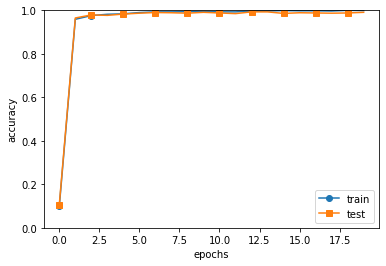

In [12]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
  
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
filter_show(network.params['W1'])

# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])